## Problem Statement:

The goal of this project is to build a machine learning model that can accurately predict payment fraud by distinguishing between legitimate and fraudulent transactions based on their characteristics,such as transaction amount,type,and accounts involved.by using a dataset of both fraudulent and non-fraudulent financial transactions,the model can be trained to achieve high accuracy,which can be used by financial institutions to prevent financial losses and protect their customers' assets in real_time.


In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset to a pandas DataFrame

Online_payment_Data=pd.read_csv(r"C:\Users\chris\Downloads\Online Payment Fraud Detection (3).csv")
Online_payment_Data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


# DATA DICTIONARY:

  
- step: represents a unit of time where 1 step equals 1 hour 
- type: type of online transaction inlcuding PAYMENT,TRANSFER,CASH_OUT,CASH_IN and DEBIT
- amount: the amount of the transaction 
- nameOrig: customer starting the transaction 
- oldbalanceOrg: balance before the transaction 
- newbalanceOrig: balance after the transaction 
- nameDest: recipient of the transaction 
- oldbalanceDest: initial balance of recipient before the transaction 
- newbalanceDest: the new balance of the recipient after the transaction 
- isFraud: fraud transaction

## DATA INSPECTION

In [3]:
# shape of the dataset
Online_payment_Data.shape

(1048575, 10)

In [4]:
# first 5 rows of the dataset

Online_payment_Data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
# last 5 rows of the dataset

Online_payment_Data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [6]:
# dataset informations

Online_payment_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
# checking the number of missing values in each column

Online_payment_Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
# checking the unique value in each columns
Online_payment_Data.nunique()

step                   95
type                    5
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
dtype: int64

# Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

# Univariate Analysis

We will analyze the distribution of individual featues and visualizing them 

In [9]:
# Exploring transaction type
Online_payment_Data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

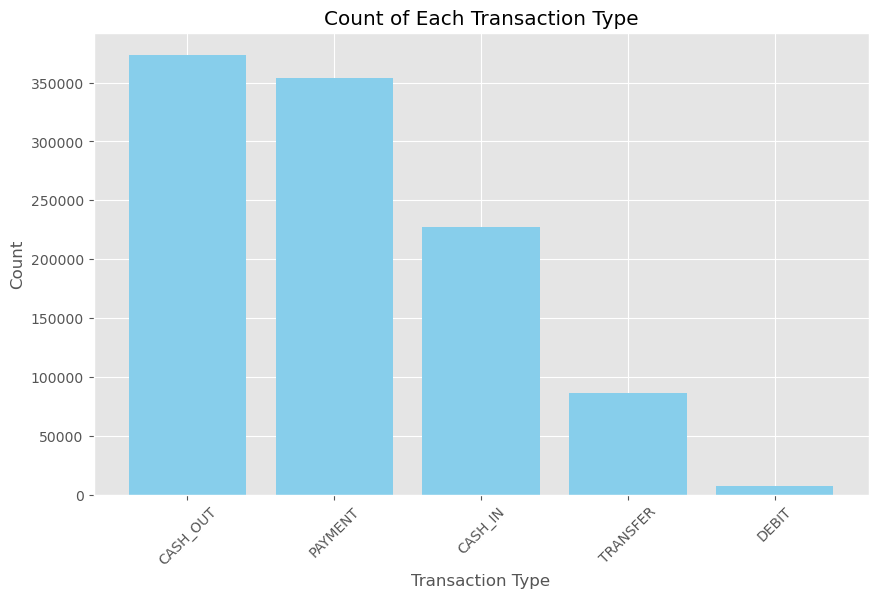

In [10]:
# Define transaction types and their counts
transaction_types = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
transaction_counts = [373641, 353873, 227130, 86753, 7178]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(transaction_types, transaction_counts, color='skyblue')
plt.title('Count of Each Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


- The dataset contains five types of transactions: CASH_OUT, PAYMENT, CASH_IN, TRANSFER, and DEBIT
- Among these types, the most common transactions are CASH_OUT and PAYMENT, with counts of 373,641 and 353,873, respectively.
- CASH_IN transactions are also quite common, but less frequent compared to CASH_OUT and PAYMENT, with a count of 227,130. 
- TRANSFER and DEBIT transactions are relatively less common, with counts of 86,753 and 7,178, respectively.

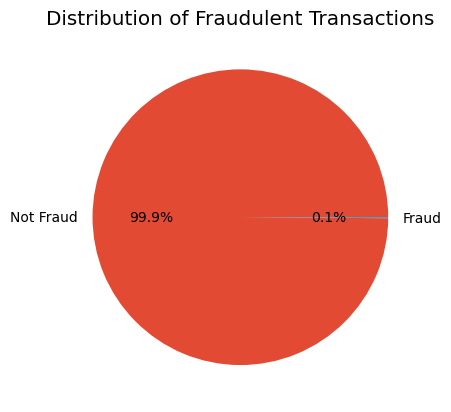

In [11]:
# Exploring the isFraud
plt.pie(Online_payment_Data['isFraud'].value_counts(), autopct='%1.1f%%', labels=['Not Fraud', 'Fraud'])
plt.title('Distribution of Fraudulent Transactions')
plt.show()

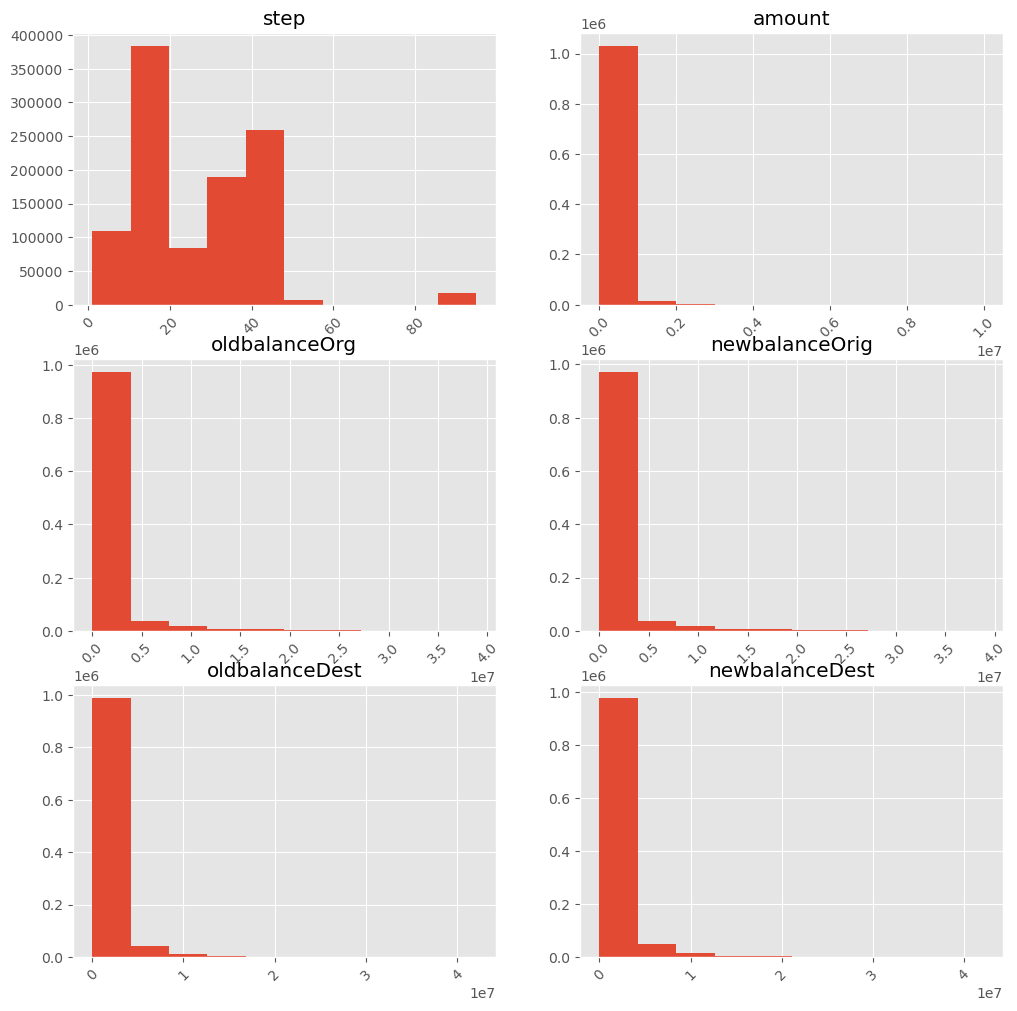

In [12]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Iterate through the columns and plot the charts
for i, col in enumerate(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']):
    row = i // 2  # Determine the row index
    col_index = i % 2   # Determine the column index using a different variable name

    # Plot a histogram for numerical columns
    counts = Online_payment_Data[col].value_counts()
    axes[row, col_index].hist(Online_payment_Data[col])
    axes[row, col_index].set_title(col)
    axes[row, col_index].set_xlabel('')
        
    # Rotate x-axis labels
    axes[row, col_index].tick_params(axis='x', rotation=45)

# Bivariate Analysis

In [13]:
# type and isFraud
type_isFraud_status = Online_payment_Data.groupby('type')['isFraud'].value_counts().unstack('isFraud')
type_isFraud_status

isFraud,0,1
type,,
CASH_IN,227130.0,NaN
CASH_OUT,373063.0,578.0
DEBIT,7178.0,NaN
PAYMENT,353873.0,NaN
TRANSFER,86189.0,564.0


- The analysis of transaction types versus fraud reveals that the majority of transactions involve `transfer`, followed by `cash-out`, `payment`, and `debit`. Interestingly, fraudulent activities are predominantly associated with `cash-out`, with 578 instances, followed closely by `transfer` with 564 instances. Notably, `debit`, `payment`, and `cash-in` transactions show no recorded instances of fraud.

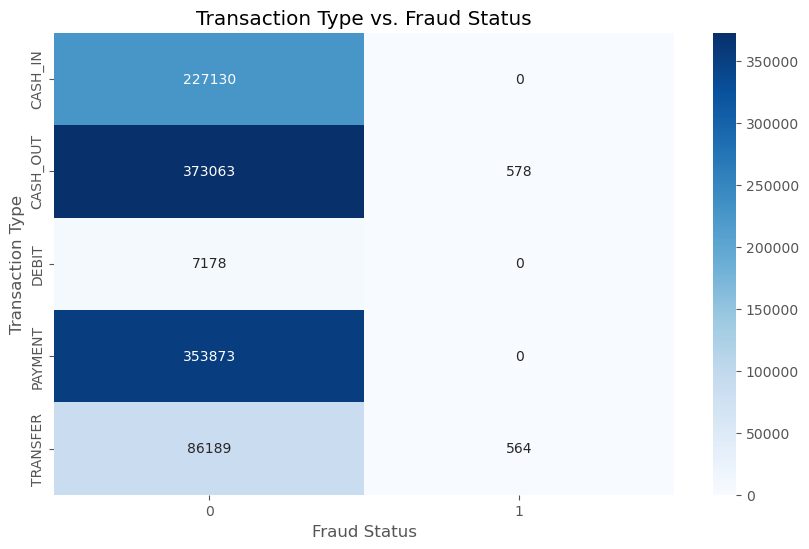

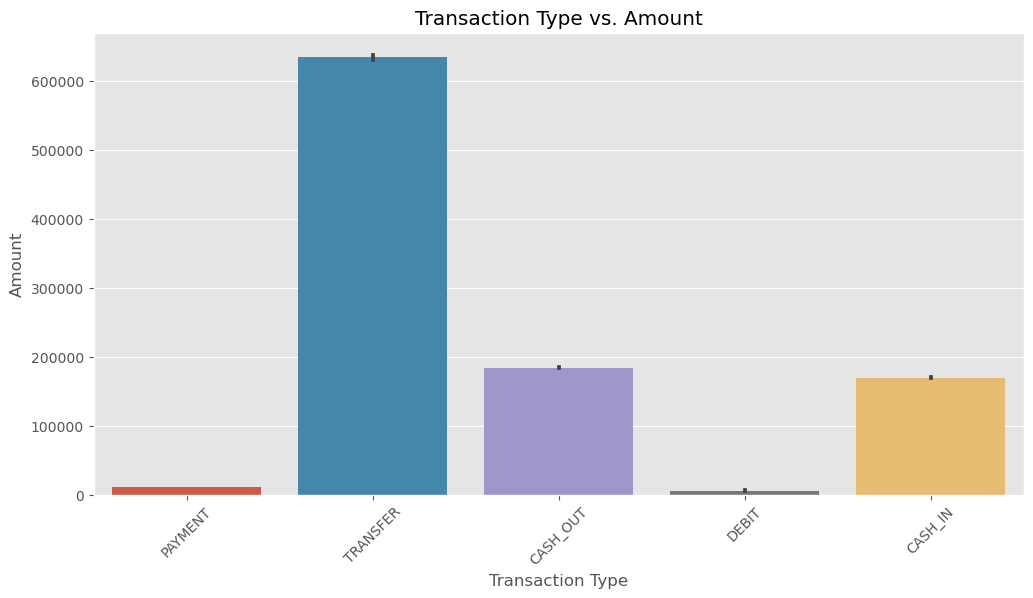

In [14]:
# Create a pivot table
pivot_table = Online_payment_Data.pivot_table(index='type', columns='isFraud', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Transaction Type vs. Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Transaction Type')
plt.show()

# Plot bar plot for 'type' against 'amount'
plt.figure(figsize=(12, 6))
sns.barplot(data=Online_payment_Data, x='type', y='amount')
plt.title('Transaction Type vs. Amount')
plt.xlabel('Transaction Type')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


# Problem solving 

In [15]:
new_df= Online_payment_Data.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [16]:
obJList = new_df.select_dtypes(include="object").columns
print(obJList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


# Label Encoding

In [17]:
# Label Encoding fir object datatypes for numeric conversion
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()

for i in obJList:
    new_df[i] = label_encoder.fit_transform(new_df[i].astype(str))
    
print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int32  
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  int32  
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  int32  
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int32(3), int64(2)
memory usage: 68.0 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,125164,170136.0,160296.36,274917,0.0,0.0,0
1,1,3,1864.28,361319,21249.0,19384.72,286716,0.0,0.0,0
2,1,4,181.00,165236,181.0,0.00,73550,0.0,0.0,1
3,1,1,181.00,961662,181.0,0.00,65464,21182.0,0.0,1
4,1,3,11668.14,567915,41554.0,29885.86,138001,0.0,0.0,0


# Multicolinearity

<AxesSubplot: >

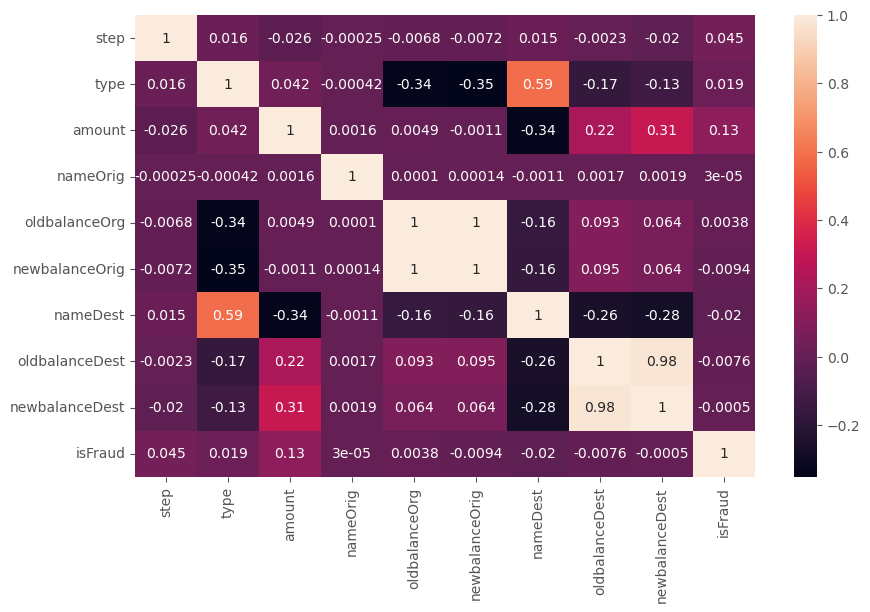

In [18]:
corr = new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [19]:
# Calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(Online_payment_Data):
    vif = pd.DataFrame()  # Corrected attribute name
    vif['variables'] = Online_payment_Data.columns
    vif['VIF'] = [variance_inflation_factor(Online_payment_Data.values, i) for i in range(Online_payment_Data.shape[1])]
    return vif

calc_vif(new_df)


,variables,VIF
0,step,2.877871
1,type,5.055132
2,amount,2.126342
3,nameOrig,2.857206
4,oldbalanceOrg,709.443407
5,newbalanceOrig,716.622550
6,nameDest,3.823784
7,oldbalanceDest,38.440149
8,newbalanceDest,41.277884
9,isFraud,1.134756


- In machine learning, VIF stands for Variance Inflation Factor. It is a statistical measure used to quantify multicollinearity in regression analysis. Multicollinearity occurs when independent variables in a regression model are highly correlated with each other.

- The VIF for each variable measures how much the variance of an estimated regression coefficient is increased due to multicollinearity. Specifically, the VIF of a variable 

  on all the other independent variables.

- Here's what the VIF values represent:

- VIF = 1: No multicollinearity. The variance of the coefficient 

  is not inflated.
- VIF > 1 and < 5: Moderate multicollinearity. The variance of the coefficient 

  is moderately inflated.
- VIF ≥ 5: High multicollinearity. The variance of the coefficient 

  is highly inflated, indicating a problematic level of multicollinearity.
- In practical terms, high VIF values indicate that the variable might be redundant or highly correlated with other variables in the model, which can lead to unstable estimates of the coefficients. In such cases, it is often advisable to either remove one of the correlated variables or use techniques like ridge regression or principal component analysis (PCA) to mitigate multicollinearity.

In [20]:
new_df['Amount_Orig'] = new_df.apply(lambda x : x['oldbalanceOrg'] -x['newbalanceOrig'],axis =1)
new_df['Amount_Dest'] = new_df.apply(lambda x : x['newbalanceDest']-x['oldbalanceDest'],axis =1)

new_df = new_df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','nameOrig','nameDest'],axis=1)

calc_vif(new_df)

,variables,VIF
0,step,2.259335
1,type,2.146816
2,amount,1.878643
3,newbalanceDest,1.409014
4,isFraud,1.129200
5,Amount_Orig,1.269987
6,Amount_Dest,1.665861


<AxesSubplot: >

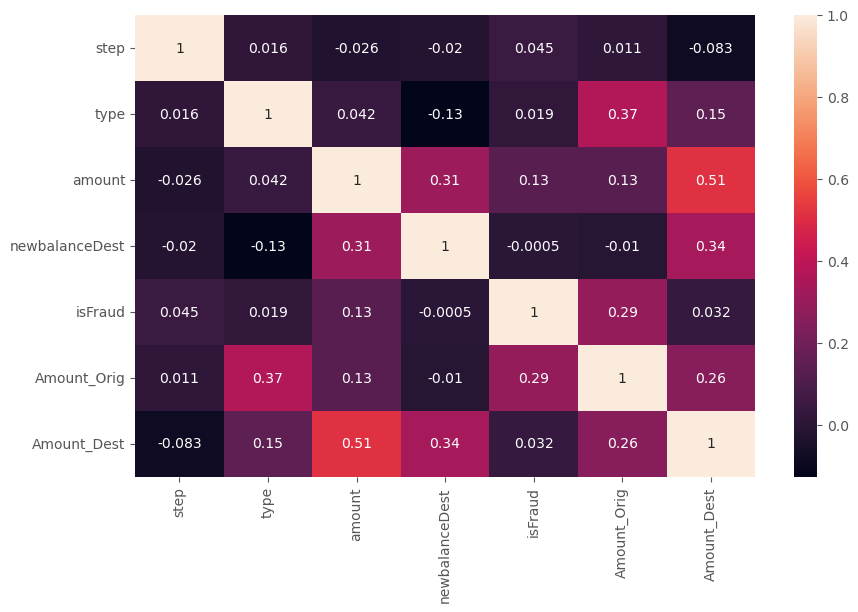

In [21]:
corr=new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

In [22]:
new_df.head()

,step,type,amount,newbalanceDest,isFraud,Amount_Orig,Amount_Dest
0,1,3,9839.64,0.0,0,9839.64,0.0
1,1,3,1864.28,0.0,0,1864.28,0.0
2,1,4,181.00,0.0,1,181.00,0.0
3,1,1,181.00,0.0,1,181.00,-21182.0
4,1,3,11668.14,0.0,0,11668.14,0.0


# This dataset is highly unbalanced

- 0 --> Normal Transaction
- 1 --> Fraudulent Transaction

In [23]:
# separating the data for analysis

legit=new_df[new_df.isFraud == 0]
fraud=new_df[new_df.isFraud == 1]

In [24]:
print(legit.shape)
print(fraud.shape)

(1047433, 7)
(1142, 7)


# Dealing with inbalanced Data

### Method to consider is Under-Sampling

In [25]:
# Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

# Number of Fradulents Transactions--> 1142

In [26]:
legit_sample=legit.sample(n=1142)

In [27]:
# Concatenating two Dataframes

new_dataset=pd.concat([legit_sample,fraud],axis=0)

In [28]:
new_dataset.head()

,step,type,amount,newbalanceDest,isFraud,Amount_Orig,Amount_Dest
474340,19,1,271816.49,535795.25,0,27131.00,535795.25
268262,15,3,18513.79,0.00,0,10041.00,0.00
243720,14,3,25681.19,0.00,0,25681.18,0.00
561790,22,3,10649.00,0.00,0,4594.00,0.00
341479,16,1,188983.05,2351837.08,0,0.00,188983.05


In [29]:
new_dataset['isFraud'].value_counts()

0    1142
1    1142
Name: isFraud, dtype: int64

In [30]:
new_dataset.groupby('isFraud').mean().astype('int')

,step,type,amount,newbalanceDest,Amount_Orig,Amount_Dest
isFraud,,,,,,
0,27,1,161489,1088757,-23578,126351
1,48,2,1192628,1077940,1184691,625074



- For non-fraudulent transactions (isFraud = 0), the most common transaction type is identified as 1.For fraudulent transactions (isFraud = 1).

- The average transaction amount for non-fraudulent transactions appears to be around 161,601 units.The average transaction amount for fraudulent transactions appears to be substantially higher, around 1,192,628 units.
- New Balance of Destination Account:
- The new balance of the destination account after the transaction for non-fraudulent cases is approximately 1,109,302 units.For fraudulent transactions, the new balance of the destination account after the transaction is notably lower, approximately 1,077,940 units.
- Amount Originated and Destination:
- The amount originated (Amount_Orig) for non-fraudulent transactions is negative (-21,367 units), which might indicate refunds or reversals.In contrast, for fraudulent transactions, the amount originated is substantially higher, approximately 1,184,691 units.
- The amount received by the destination account (Amount_Dest) for non-fraudulent transactions is around 134,450 units, whereas for fraudulent transactions, it is around 625,074 units.

# Splitting the data into features & targets

In [31]:
X=new_dataset.drop(columns='isFraud',axis=1)
y=new_dataset['isFraud']

In [32]:
print(X)

         step  type     amount  newbalanceDest  Amount_Orig  Amount_Dest
474340     19     1  271816.49       535795.25     27131.00    535795.25
268262     15     3   18513.79            0.00     10041.00         0.00
243720     14     3   25681.19            0.00     25681.18         0.00
561790     22     3   10649.00            0.00      4594.00         0.00
341479     16     1  188983.05      2351837.08         0.00    188983.05
...       ...   ...        ...             ...          ...          ...
1047888    95     1   56745.14       108179.02     56745.14     56745.14
1048221    95     4   33676.59            0.00     33676.59         0.00
1048222    95     1   33676.59        33676.59     33676.59     33676.59
1048323    95     4   87999.25            0.00     87999.25         0.00
1048324    95     1   87999.25        87999.25     87999.25     87999.25

[2284 rows x 6 columns]


In [33]:
print(y)

474340     0
268262     0
243720     0
561790     0
341479     0
          ..
1047888    1
1048221    1
1048222    1
1048323    1
1048324    1
Name: isFraud, Length: 2284, dtype: int64


# Split the data into Training data & Testing Data

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(2284, 6) (1827, 6) (457, 6)


# Model Training 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [37]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

In [38]:
# accuracy on training data
X_train_prediction=lr_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [39]:
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  0.8790366721401204


In [40]:
# accuracy on test data

from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 88.4 %


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.8840262582056893,
 'Precision': 0.8888888888888888,
 'Recall': 0.8771929824561403,
 'F1-Score': 0.8830022075055187}

#### Support Vector Machine

In [42]:
# Create an instance of Support vector machine
svm_model = SVC(probability=True)

# Fit the model on the scaled training
svm_model.fit(X_train, y_train)

SVC(probability=True)

# Model Evaluation 

In [43]:
# accuracy on training data
X_train_prediction=svm_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [44]:
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  0.7996715927750411


In [45]:
# Predict the classes of the testing data
y_pred = svm_model.predict(X_test)

# print accuracy score for SVM
print(f'The accuracy of the SVM is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the SVM is 81.39999999999999 %


In [46]:
svm_result = metrics_calculator(y_test, y_pred, 'svm_model')
svm_result

{'Model': 'svm_model',
 'Accuracy': 0.8140043763676149,
 'Precision': 0.9612903225806452,
 'Recall': 0.6535087719298246,
 'F1-Score': 0.7780678851174936}

#### K-Nearest Neighbour 

In [47]:
# Create an instance of K-Nearest Neighbour
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

# Model Evaluation

In [48]:
# accuracy on training data
X_train_prediction=knn_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [49]:
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  0.9124247400109469


In [50]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test)

# print accuracy score for K-Nearest Neigbour
print(f'The accuracy of the KNN is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the KNN is 87.5 %


In [51]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.87527352297593,
 'Precision': 0.8766519823788547,
 'Recall': 0.8728070175438597,
 'F1-Score': 0.8747252747252747}

## Decision Tree

In [52]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

## Model Evaluation

In [53]:
# accuracy on training data
X_train_prediction=dt_model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)

In [54]:
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  1.0


In [55]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test)

# print accuracy score for DecisionTree Classifier
print(f'The accuracy of the DecisionTree is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the DecisionTree is 95.39999999999999 %


In [56]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.9540481400437637,
 'Precision': 0.9294605809128631,
 'Recall': 0.9824561403508771,
 'F1-Score': 0.9552238805970149}

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       legit      0.879     0.891     0.885       229
       fraud      0.889     0.877     0.883       228

    accuracy                          0.884       457
   macro avg      0.884     0.884     0.884       457
weighted avg      0.884     0.884     0.884       457



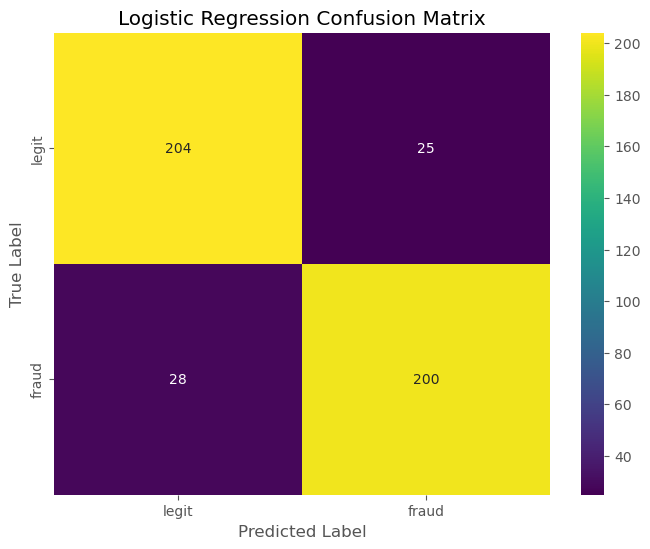

Decision Tree Classification Report:
              precision    recall  f1-score   support

       legit      0.981     0.926     0.953       229
       fraud      0.929     0.982     0.955       228

    accuracy                          0.954       457
   macro avg      0.955     0.954     0.954       457
weighted avg      0.956     0.954     0.954       457



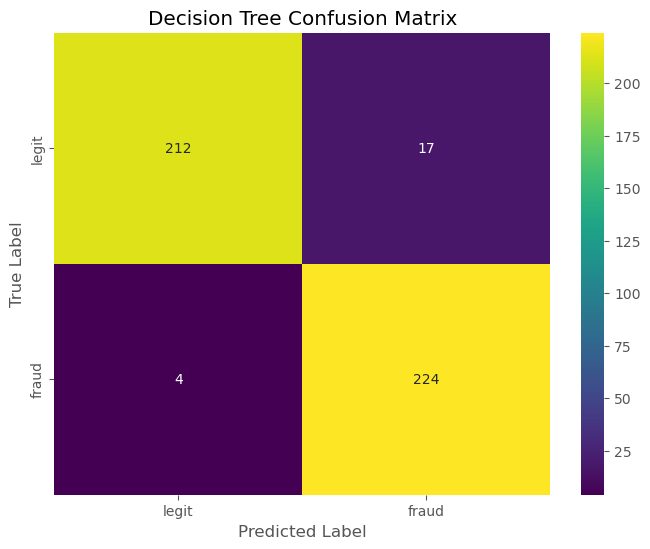

SVM Classification Report:
              precision    recall  f1-score   support

       legit      0.738     0.974     0.840       229
       fraud      0.961     0.654     0.778       228

    accuracy                          0.814       457
   macro avg      0.850     0.814     0.809       457
weighted avg      0.850     0.814     0.809       457



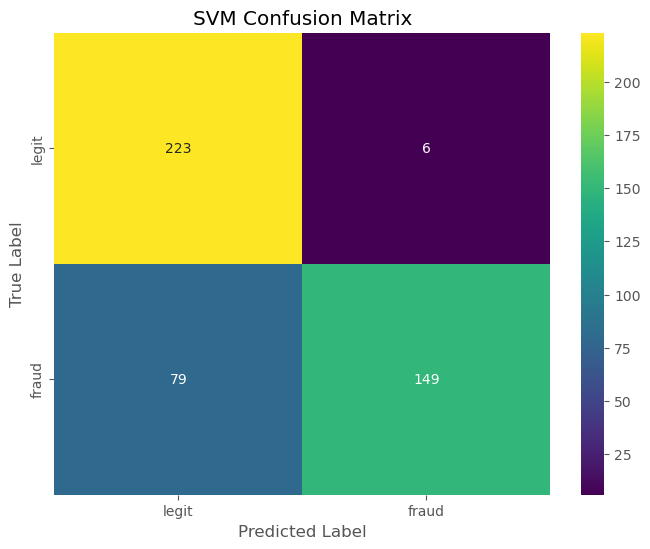

KNN Classification Report:
              precision    recall  f1-score   support

       legit      0.874     0.878     0.876       229
       fraud      0.877     0.873     0.875       228

    accuracy                          0.875       457
   macro avg      0.875     0.875     0.875       457
weighted avg      0.875     0.875     0.875       457



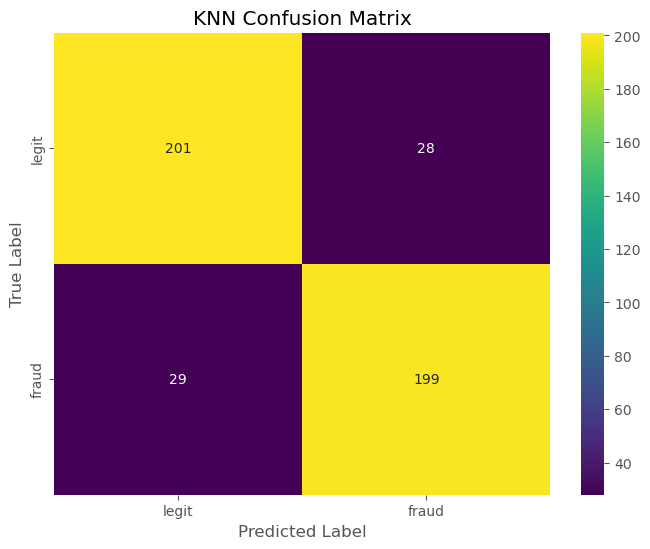

In [57]:
from sklearn.metrics import confusion_matrix, classification_report

# Create a list of models and their corresponding names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'KNN']

# Set the labels
labels = ['legit', 'fraud']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test)
    
    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [58]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, svm_result, knn_result])

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.884026,0.888889,0.877193,0.883002
1,dt_model,0.954048,0.929461,0.982456,0.955224
2,svm_model,0.814004,0.961290,0.653509,0.778068
3,knn_model,0.875274,0.876652,0.872807,0.874725


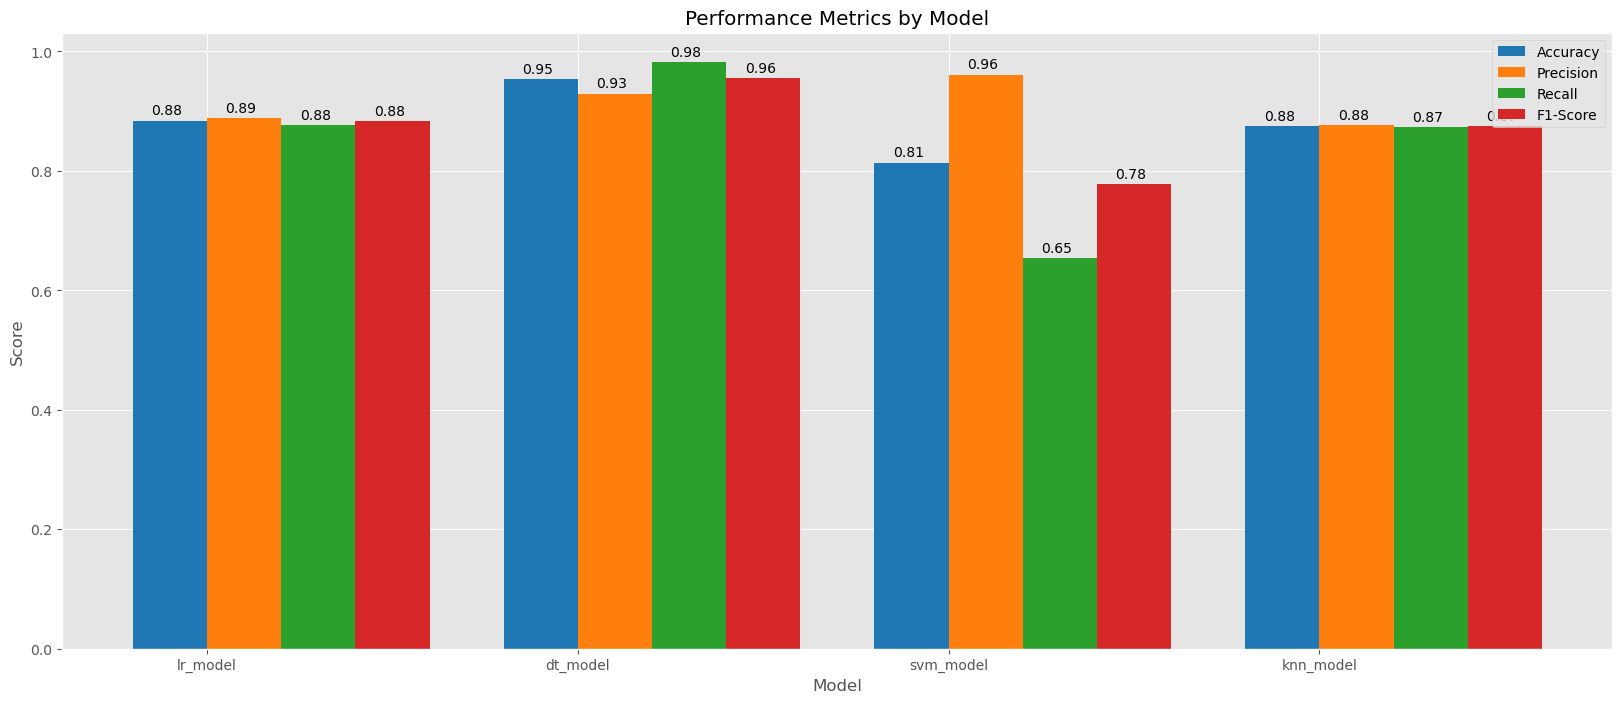

In [59]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()

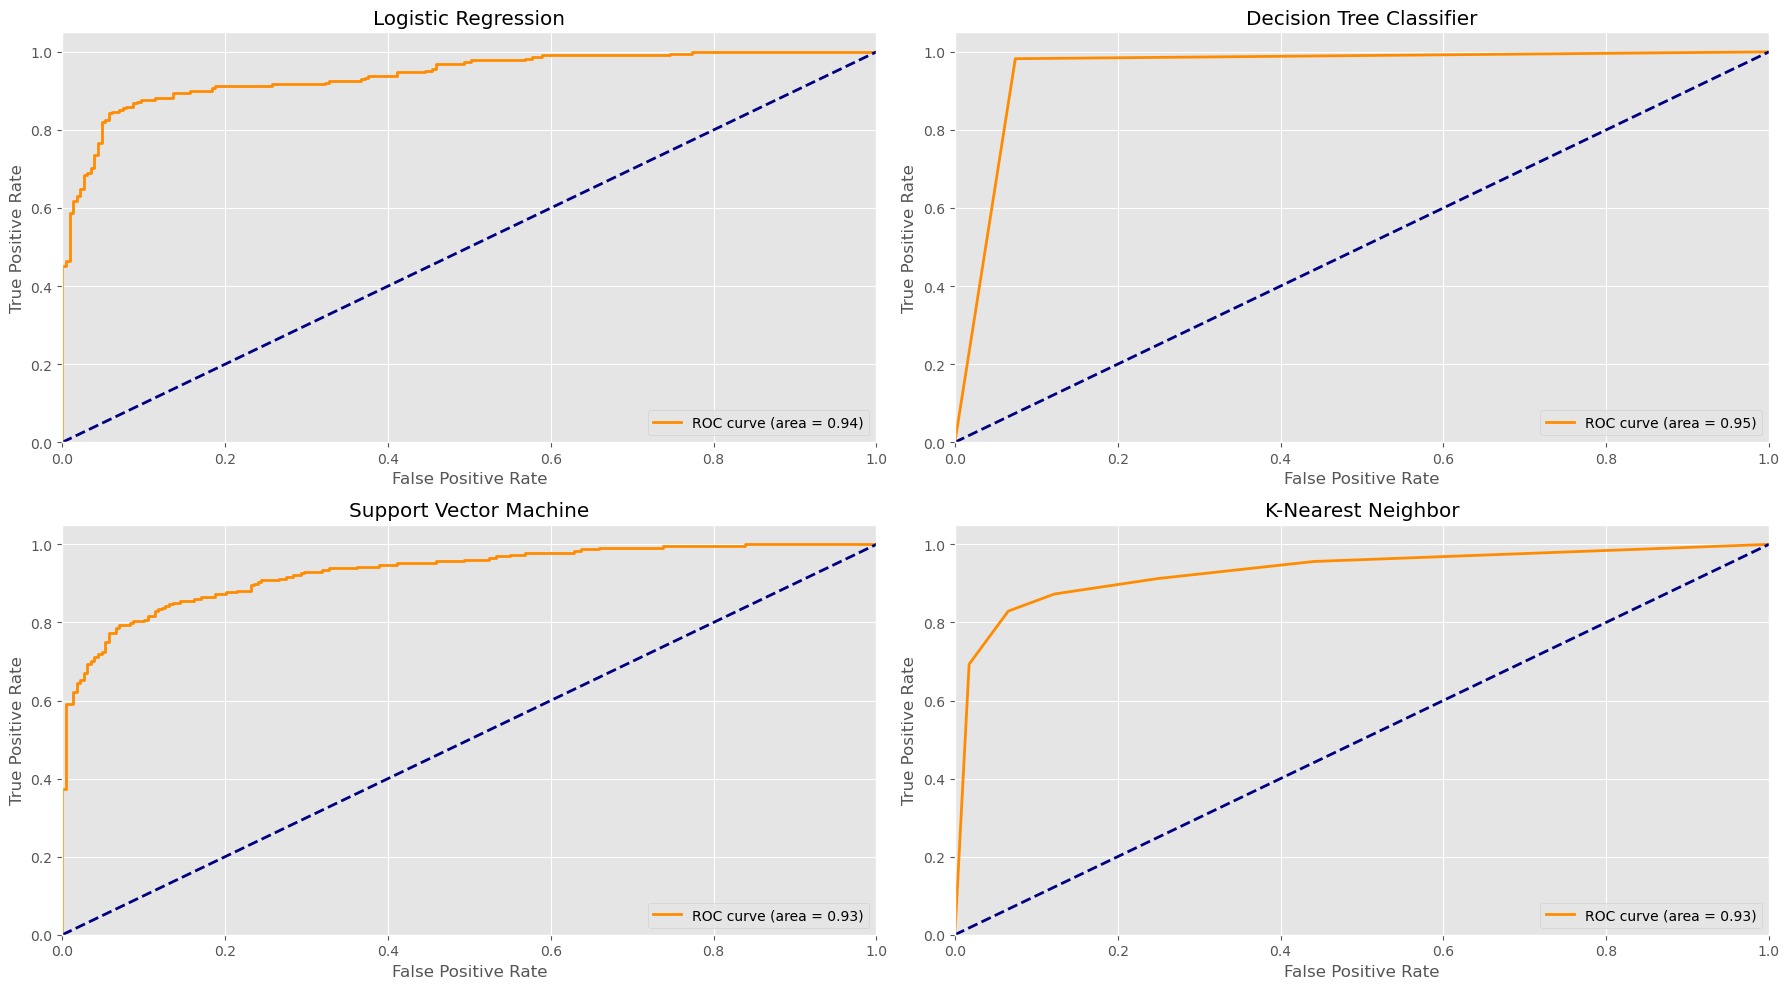

In [60]:
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, dt_model, svm_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'Support Vector Machine', 'K-Nearest Neighbor']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axes[i].plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()

## Feature Engineering 
After training the best performing model which is Decision Tree model, We will analyze feature importance.  For example, we will use Random Forest Classifier model to check feature importances as follows:

In [61]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

Amount_Orig: 0.40
step: 0.20
type: 0.11
amount: 0.11
Amount_Dest: 0.10
newbalanceDest: 0.07


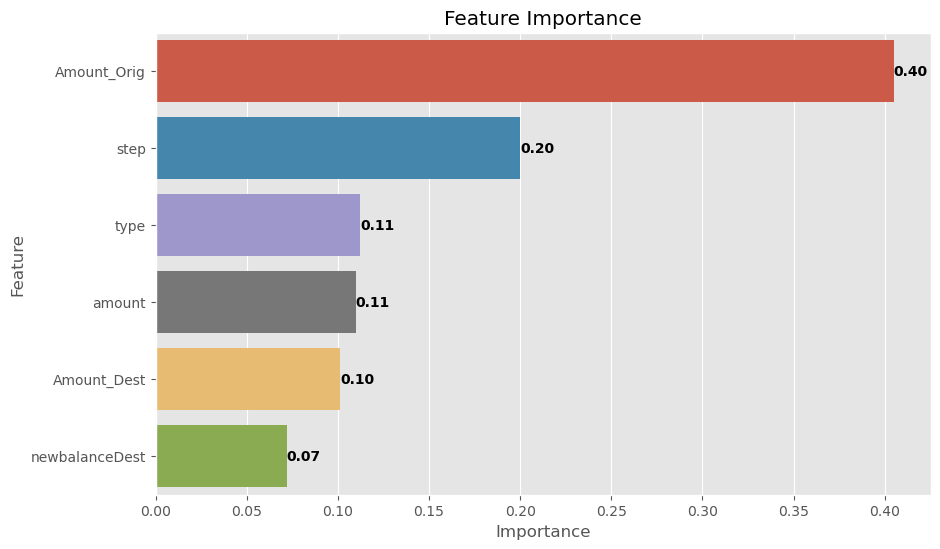

In [62]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

## A Bit of Features Selection
We will use the following features; Amount_Orig, step, ,type, amount,Amount_Dest,newbalanceDest  to retrain the Decision Tree model.

In [63]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

X_train2 = X_train[['Amount_Orig', 'step', 'type', 'amount', 'Amount_Dest']]
X_valid2 = X_valid[['Amount_Orig', 'step', 'type', 'amount', 'Amount_Dest']]

In [64]:
# Since Decision Tree model is the best performing model

# fit the model on the new training set
dt_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = dt_model.predict(X_valid2)

In [65]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.92


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.92
Precision Score: 0.92
Recall Score: 0.93
F1-score: 0.92


# Saving the base line model using Pickle
- In Python,the pickle module is used for serializing objects.serialization is the process of converting a python object into a byte stream,and deserialization is the reverse process of reconstructing the python object from the byte stream

In [67]:
# Saving the model
import pickle
pickle_out=open('classifier.pkl',mode='wb')
pickle.dump(dt_model,pickle_out)
pickle_out.close()

## Model Deployment of the Online-payment Fraud Prediction Model using Streamlit 
- We will start with the basic installations:

In [68]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

In [71]:
%%writefile app.py

import pickle
import streamlit as st

#Loading the trained model

pickle_in = open('classifier.pkl','rb')
classifier=pickle.load(pickle_in)

@st.cache()

# defining the function which will make the prediction using the data which the user input
def prediction(Amount_Orig, step, type, amount, Amount_Dest):
    
     #pre-processing user input
    if type == 'CASH OUT':
        type = 1
    elif type == 'DEBIT':
        type = 2
    elif type == 'CASH IN':
        type = 0
    elif type == 'PAYMENT':
        type = 3
    elif type == 'TRANSFER':
        type = 4
  
    
    # Making predictions
    prediction=classifier.predict([[Amount_Orig, step, type, amount, Amount_Dest]])
    if prediction ==0:
        pred='legit'
    else:
        pred='Fraud'
        
    return pred
# This is the main function in which we define our webpage 


def main():
    # front end element of the web page
    
    html_temp = '''
    <div style = 'background-colour:yellow;padding:13px'>
    <h1 style = 'color:yellow;text_align:center;'>Streamlit online_payment Fraud Prediction ML App </h1>
    </div>
    '''
     
   # display the front end aspect 
    st.markdown(html_temp,unsafe_allow_html=True)

   # following Lines create boxes in which user can enter data required to make prediction
    Amount_Orig=st.number_input("Amount_Orig")
    step=st.number_input("Step")
    amount=st.number_input("Amount")
    type=st.selectbox('Type',("PAYMENT","TRANSFER","CASH OUT","DEBIT","CASH IN"))
    Amount_Dest=st.number_input("Amount_Dest")
    
    
    result = ""
    
    # Convert 'amount' to float
    amount = float(amount)

#when 'predict' is clicked,make the prediction and store it
    if st.button("Predict"):
        result=prediction(Amount_Orig, step, type, amount, Amount_Dest)
        st.success('Your OnlinePayment is {}'.format(result))
        print(result)
        
if __name__== '__main__':
    main()

Overwriting app.py


In [72]:
from pyngrok import ngrok

# set your ngrok authentication token 

ngrok.set_auth_token("2dDbZvxrCIoD7SEo1FLJ48TwkyS_4TB1bqKTL4iHCZXQGt5Ap")

# connect to ngrok with authentication 
public_url=ngrok.connect(8501)
public_url

<NgrokTunnel: "https://128b-102-88-81-9.ngrok-free.app" -> "http://localhost:8501">

t=2024-04-04T20:34:30+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=1cdfb9c7a737 clientid=8e49e41c52a8930c7c75b4d85160b541
t=2024-04-04T20:34:30+0100 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=04e4e18e460e err="session closed"
t=2024-04-04T20:34:30+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T20:34:31+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T20:34:32+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"conn

t=2024-04-04T20:47:32+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T20:48:02+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T20:48:32+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T20:49:02+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngr

t=2024-04-04T21:03:33+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T21:04:03+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T21:04:33+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T21:05:03+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngr

t=2024-04-04T21:19:33+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T21:20:03+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T21:20:33+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-04-04T21:21:03+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=04e4e18e460e err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngr